In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Load the Iris dataset
iris = datasets.load_iris()

# Create a DataFrame from the Iris dataset
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Print the dataset in a table format
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# Check if feature_names attribute exists, if not, print the feature names manually
if hasattr(iris, 'feature_names'):
    feature_names = iris.feature_names
else:
    # If feature_names attribute is not available, you can manually print the names
    feature_names = [f"Feature {i}" for i in range(iris.data.shape[1])]

# Print the feature names
for i, feature_name in enumerate(feature_names):
    print(f"Feature {i + 1}: {feature_name}")


Feature 1: sepal length (cm)
Feature 2: sepal width (cm)
Feature 3: petal length (cm)
Feature 4: petal width (cm)


In [8]:
# Using only petal length and sepal length features
X = iris.data[:, 2:]
y = iris.target
print(X)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train a Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)


In [ ]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [ ]:
# Create a new data point with petal length and sepal length measurements
new_data_point = np.array([[4.8, 3.0]])  # Example measurements
predicted_class = clf.predict(new_data_point)

In [ ]:
# Map the predicted class to the actual Iris species
iris_species = iris.target_names[predicted_class]

print(f"Predicted Iris species for the new data point: {iris_species[0]}")

Predicted Iris species for the new data point: virginica


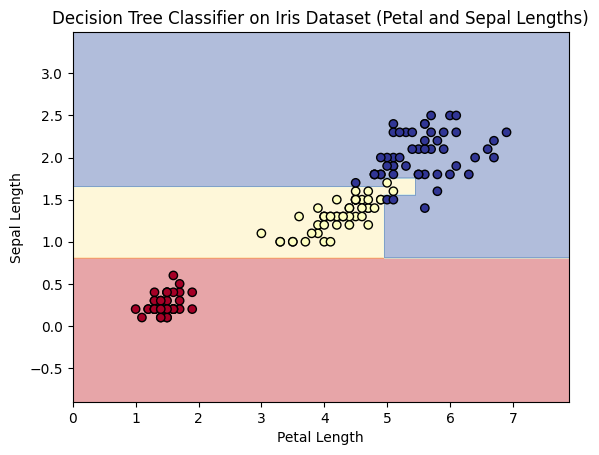

In [ ]:
# Create a mesh grid for the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Create and train a Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Predict the class labels for the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.title('Decision Tree Classifier on Iris Dataset (Petal and Sepal Lengths)')

plt.show()




